# FastAI Intro

This is some highlevel usage of the fastai v4 course.

## Image Classification

Here we are trying to do some basic image classification.
Let's get started

In [1]:
from fastai2.vision.all import *

In [2]:
pet_path = untar_data(URLs.PETS)

In [3]:
pet_path.ls()

(#2) [Path('/storage/data/oxford-iiit-pet/images'),Path('/storage/data/oxford-iiit-pet/annotations')]

In [4]:
(pet_path/"images").ls()

(#7393) [Path('/storage/data/oxford-iiit-pet/images/american_bulldog_146.jpg'),Path('/storage/data/oxford-iiit-pet/images/japanese_chin_12.jpg'),Path('/storage/data/oxford-iiit-pet/images/Sphynx_247.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_158.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_76.jpg'),Path('/storage/data/oxford-iiit-pet/images/shiba_inu_207.jpg'),Path('/storage/data/oxford-iiit-pet/images/Siamese_56.jpg'),Path('/storage/data/oxford-iiit-pet/images/keeshond_194.jpg'),Path('/storage/data/oxford-iiit-pet/images/miniature_pinscher_89.jpg'),Path('/storage/data/oxford-iiit-pet/images/leonberger_42.jpg')...]

As you see from the above, we have a data set of pets. Basically different types of cats and dog. Here we are only interested about finding whether a given pet is a cat or dog.

In this dataset, cats names are starting with a capital letter. (eg: `Siamese_56.jpg`)

In [5]:
## Let's create a data loader which will load images and do all the transformations
dls = ImageDataLoaders.from_name_func(
    path = pet_path/"images",
    fnames = get_image_files(pet_path/"images"),
    label_func = lambda x: x[0].isupper(),
    valid_pct = 0.2,
    item_tfms = Resize(224)
)

In [6]:
## Let's create the learner which does the actual deep learning
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [7]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.169541,0.035969,0.010149,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.060923,0.015341,0.004736,00:25


See this is trained queit fasly. The error rate is soo small. Basically it's like 0.5%.

**That means, this model identify cats and dogs very accurately.**

## Fit vs Fine Tune

In the above code, we used `.fine_tune(1)` instead of `.fit(1)`.

`fine_tune` is a special function related to fitting models with pretrained weights. So, it will do special handling with that pre-trained model (AKA: weights).

It'll help us to achive state of the art results much faster.

**Let's try doing .fit(2) now**

In [19]:
learn_fit = cnn_learner(dls, resnet34, metrics=error_rate)
learn_fit.fit(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.063097,0.023842,0.006766,00:25
1,0.028982,0.014466,0.004736,00:25
2,0.025585,0.016021,0.006766,00:25
3,0.020616,0.014846,0.006766,00:25
4,0.015453,0.016081,0.005413,00:25


**Let's try doing .fint_tune(2) now**

In [20]:
learn_fine_tune = cnn_learner(dls, resnet34, metrics=error_rate)
learn_fine_tune.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.158075,0.038829,0.009472,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.051119,0.016467,0.005413,00:35
1,0.041304,0.022138,0.005413,00:35
2,0.022118,0.009753,0.004736,00:35
3,0.009468,0.014039,0.004736,00:35
4,0.007118,0.006681,0.002706,00:35


### Notes

As you can see, when we do `.fit()`, it does complete in less time. But the doc says the other way around. May be that's due since we use a smaller dataset.

But with `.fine_tune()`, it keeps improving as we increase epochs.

## Loss vs Error Rate

If you look at the above, it shows both the loss function and the error rate. Here, error rate is for human reading where it won't show us a smallest change in the model parameters. 

Eg:-

* We can still detect cats correctly, but it might improves the detection.

In the above case, that does not reflected via error rate. But it's shown in the loss. That's for the model to optimize.

## Overfitting and Loss Function

Traditionally, this is how we discovered overfitting.

* When we are training the model for multiple epochs, both training loss and the validation loss goes down.
* training loss will always go down.
* But there's a point where validation loss increasing.
* That's the point for overfitting

**But, not amymore**

Even is such cases, it's possible that our error_rate is improving. (going down). Then it's not overfitting yet. So, we need to look at that too.

## Trying this model

It could be pretty nice, if we can try this predicted model.
Actually, we can. Let's do it.

In [8]:
## For that, we need to import this. It lives in a file called `utils.py` in this directory.
## I just copied it from the `course-v4` directory
from utils import *

In [9]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

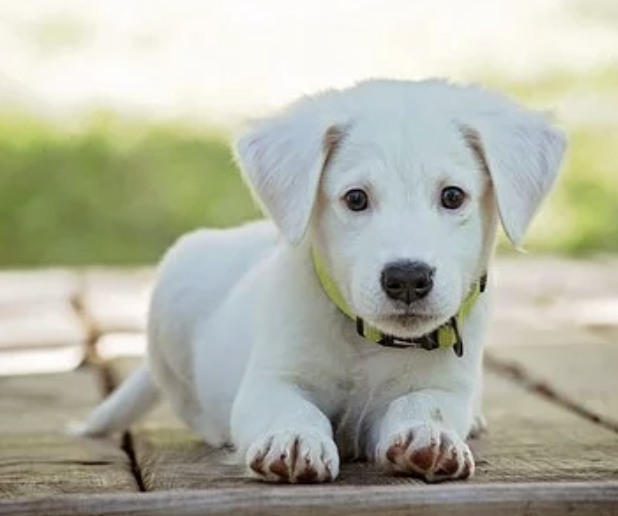

In [11]:
## Let's check the image

uploaded_img = PILImage.create(uploader.data[0])
uploaded_img

In [12]:
## Let's do the predictions
result = learn.predict(uploaded_img)
result

('False', tensor(0), tensor([9.9999e-01, 8.0151e-06]))

In [13]:
is_cat = result[0]
prob = result[2][1]

print(f"Is this a cat?: {is_cat}")
print(f"Probability: {prob:.6f}")

Is this a cat?: False
Probability: 0.000008


### Note on our model

If you looked at carefully and experimented with various images, you might have seen that, this model is not suited for detecting catoon version of cat.

That's simply because, this model has not seen such image before.

# Questions

1. Do you need these for deep learning?
   - Lots of math T / F
   - Lots of data T / F
   - Lots of expensive computers T / F
   - A PhD T / F
   
  `(Non of the above) `
  
1. Name five areas where deep learning is now the best in the world.

   ~~~
   * Medicine
   * Survailance
   * Automated Shopping
   * AI Gaming
   * Business Analytics
   ~~~
   
1. What was the name of the first device that was based on the principle of the artificial neuron?
1. Based on the book of the same name, what are the requirements for "Parallel Distributed Processing"?

1. What were the two theoretical misunderstandings that held back the field of neural networks?

```
You need to learn Math and other low level stuff first
You need more data.
```

1. What is a GPU?

```
It's a massive parallel processing unit.
```
1. Open a notebook and execute a cell containing: `1+1`. What happens?
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
1. Complete the Jupyter Notebook online appendix.

1. Why is it hard to use a traditional computer program to recognize images in a photo?
```
It's very hard programme a logic/steps to do so.
```

1. What did Samuel mean by "Weight Assignment"?
1. What term do we normally use in deep learning for what Samuel called "Weights"?

```
Parameters
```

1. Draw a picture that summarizes Arthur Samuel's view of a machine learning model
1. Why is it hard to understand why a deep learning model makes a particular prediction?
1. What is the name of the theorem that a neural network can solve any mathematical problem to any level of accuracy?
1. What do you need in order to train a model?

```
* Input data
* Input labels
```

1. How could a feedback loop impact the rollout of a predictive policing model?
1. Do we always have to use 224x224 pixel images with the cat recognition model?

1. What is the difference between classification and regression?
```
* classification - about categories
* regression - about never ending values
```

1. What is a validation set? What is a test set? Why do we need them?

```
Validation test used to measure the effectiveness of the model.
Test set used to test the final model.
```

1. What will fastai do if you don't provide a validation set?
```
It will create 20% of our input data as the validation set.
```

1. Can we always use a random sample for a validation set? Why or why not?

1. What is overfitting? Provide an example.
```
Adding bias to the model for the given input. If we train our model with cat images, it's overfitted for cat images. When we show a cat cartoon it, it cannot predict correctly.
```

1. What is a metric? How does it differ to "loss"?
1. How can pretrained models help?
1. What is the "head" of a model?
1. What kinds of features do the early layers of a CNN find? How about the later layers?
1. Are image models only useful for photos?
1. What is an "architecture"?
1. What is segmentation?
1. What is `y_range` used for? When do we need it?
1. What are "hyperparameters"?
1. What's the best way to avoid failures when using AI in an organization?